# Time Series Analysis for Top 5 Best Zip Codes for Realty Investments

### by John Nahra, Paul Schulken, and Annie Zheng

# Overview

# Business Understanding

# Data Understanding

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [5]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

## 5-Year Return

In [6]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [7]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [8]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


## Down Deviation

In [9]:
dates = list(df.columns[67:])
dates

['2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '2003-03',
 '2003-04',
 '2003-05',
 '2003-06',
 '2003-07',
 '2003-08',
 '2003-09',
 '2003-10',
 '2003-11',
 '2003-12',
 '2004-01',
 '2004-02',
 '2004-03',
 '2004-04',
 '2004-05',
 '2004-06',
 '2004-07',
 '2004-08',
 '2004-09',
 '2004-10',
 '2004-11',
 '2004-12',
 '2005-01',
 '2005-02',
 '2005-03',
 '2005-04',
 '2005-05',
 '2005-06',
 '2005-07',
 '2005-08',
 '2005-09',
 '2005-10',
 '2005-11',
 '2005-12',
 '2006-01',
 '2006-02',
 '2006-03',
 '2006-04',
 '2006-05',
 '2006-06',
 '2006-07',
 '2006-08',
 '2006-09',
 '2006-10',
 '2006-11',
 '2006-12',
 '2007-01',
 '2007-02',
 '2007-03',
 '2007-04',
 '2007-05',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2007-11',
 '2007-12',
 '2008-01',
 '2008-02',
 '20

In [10]:
dates_offset = list(df.columns[7:-60])
dates_offset

['1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '20

In [11]:
df_mean = df.copy()

In [12]:
for (i,v) in zip(dates,dates_offset):
    df_mean[f'five-year {i}'] = ((df_mean[i]/df_mean[v])-1)*100
    

In [13]:
df_mean.sort_values(by='five-year 2018-04',ascending=False)

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,five-year 2017-08,five-year 2017-09,five-year 2017-10,five-year 2017-11,five-year 2017-12,five-year 2018-01,five-year 2018-02,five-year 2018-03,five-year 2018-04,five-year five_year
7302,93292,80216,Denver,CO,Denver,Denver,7303,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,176.470588,176.634512,177.578947,173.872951,-99.827678
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,114600.0,114500.0,114500.0,...,178.811227,178.796095,175.568482,173.752599,177.904564,182.343831,181.440162,176.574803,167.943262,-99.924145
5830,79095,48240,Redford,MI,Detroit,Wayne,5831,67800.0,68200.0,68500.0,...,154.166667,157.954545,155.390335,154.379562,154.480287,154.577465,156.993007,161.458333,161.224490,-99.464370
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,108200.0,107800.0,107500.0,...,170.813397,170.259638,170.226033,171.196911,170.940819,168.319763,163.956835,161.505982,159.379310,-99.892818
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,54600.0,54800.0,55000.0,...,139.103555,145.975232,153.115265,158.281250,160.280374,158.769231,160.030395,161.343284,159.210526,-99.772881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14577,85489,62440,Lerna,IL,Charleston,Coles,14578,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14587,74197,37141,Orlinda,TN,Nashville,Robertson,14588,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14623,76460,43013,Hartford,OH,Columbus,Licking,14624,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14707,69681,28039,East Spencer,NC,Charlotte,Rowan,14708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_mean = df_mean.dropna()

In [15]:
df_mean = df_mean.iloc[:,-205:]

In [16]:
df_mean = df_mean.mean()

In [17]:
df_mean.to_csv('national.csv')

In [18]:
top_10_zipcodes = list(df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(10).iloc[1:10,0].values)
top_10_zipcodes

['94601',
 '48240',
 '94590',
 '33705',
 '37210',
 '33460',
 '15201',
 '11216',
 '37207']

In [19]:
top_10_cities = list(df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(10).iloc[1:10,1].values)

In [20]:
top_10_indexes = list(df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(10).iloc[1:10].index)

In [21]:
down_deviation = []
df_mean = pd.read_csv('data/national.csv')
for i in range(0,9):
    city = df.loc[df['zipcode'] == top_10_zipcodes[i]]
    city = city.iloc[:,7:-1]
    city = city.T
    city = city.rename(columns={top_10_indexes[i]:'home price'})
    city.index = city.index.astype('datetime64[ns]')
    city['5 year shift'] = city['home price'].shift(60)
    city['5 year return'] = ((city['home price']/city['5 year shift'])-1)*100
    city_dvar = city.dropna()
    city_dvar['mar'] = df_mean.iloc[:,1].values
    city_dvar['5 year minus mar'] = city_dvar['5 year return'] - city_dvar['mar']
    city_down = city_dvar.loc[city_dvar['5 year minus mar'] < 0]
    city_down['neg sq'] = city_down['5 year minus mar']**2
    dd = np.sqrt(city_down['neg sq'].sum()/city_dvar['mar'].count())
    down_deviation.append(dd)
tuples = tuple(zip(top_10_cities,down_deviation))
sorted_tuples = sorted(tuples, key=lambda x: x[1])


In [22]:
sorted_tuples

[('New York', 0.0),
 ('Pittsburgh', 10.475165014814573),
 ('Nashville', 16.457042623270837),
 ('Nashville', 18.463691341053426),
 ('Saint Petersburg', 20.327570809576375),
 ('Oakland', 20.741096677061226),
 ('Lake Worth', 23.95856075385832),
 ('Vallejo', 27.678102622623772),
 ('Redford', 37.35104365347467)]

# Modeling

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
top_5_zipcodes = ['80216','94601','33705','37210','15201']
top_5_cities = ['Denver','Oakland','Saint Petersburg','Nashville','Pittsburgh']
top_5_indexes = [7302,1477,2661,6105,6563]

/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency informati

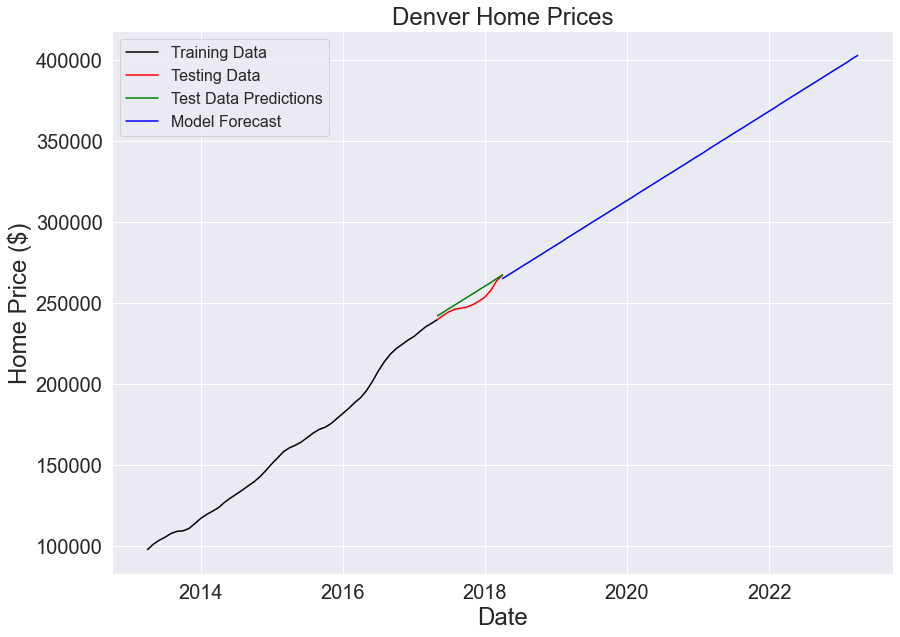

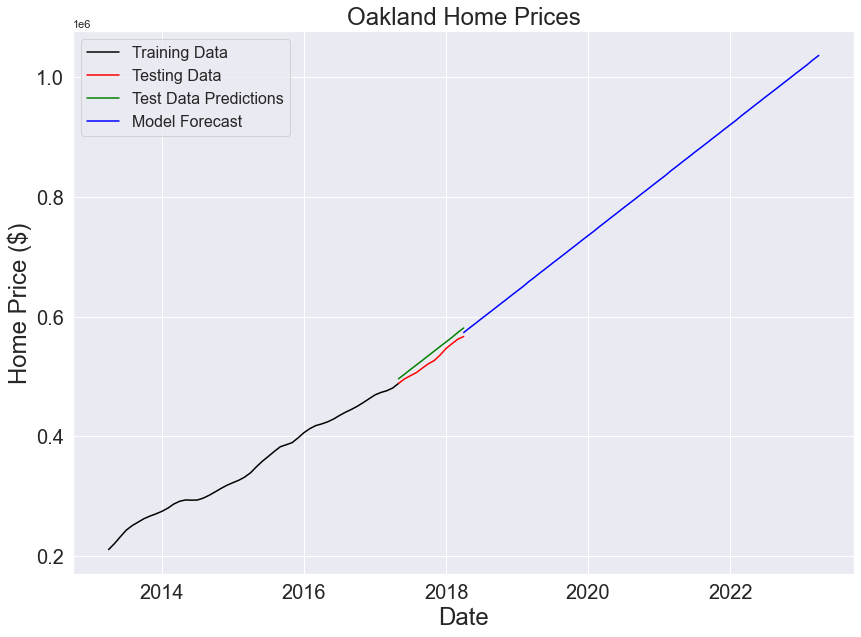

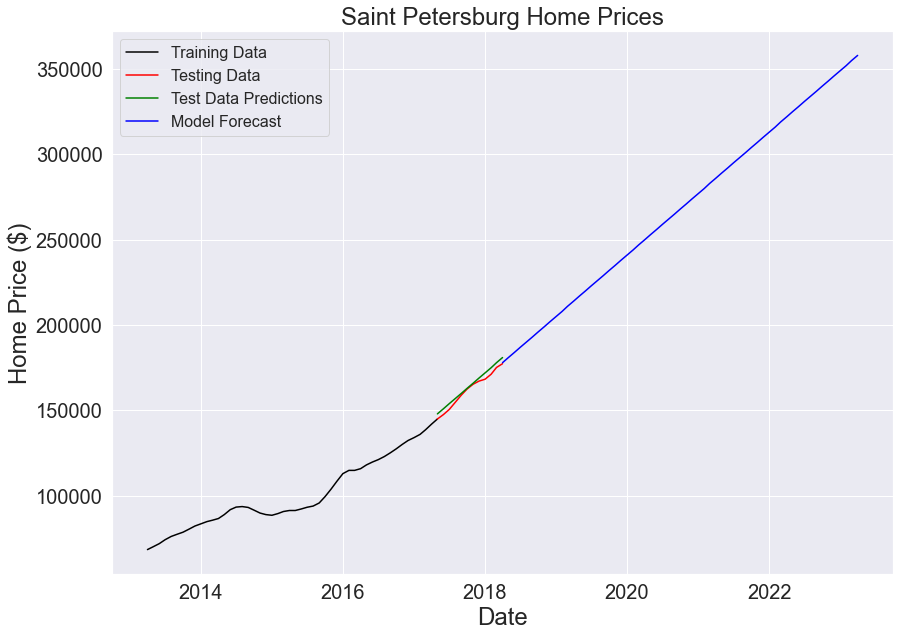

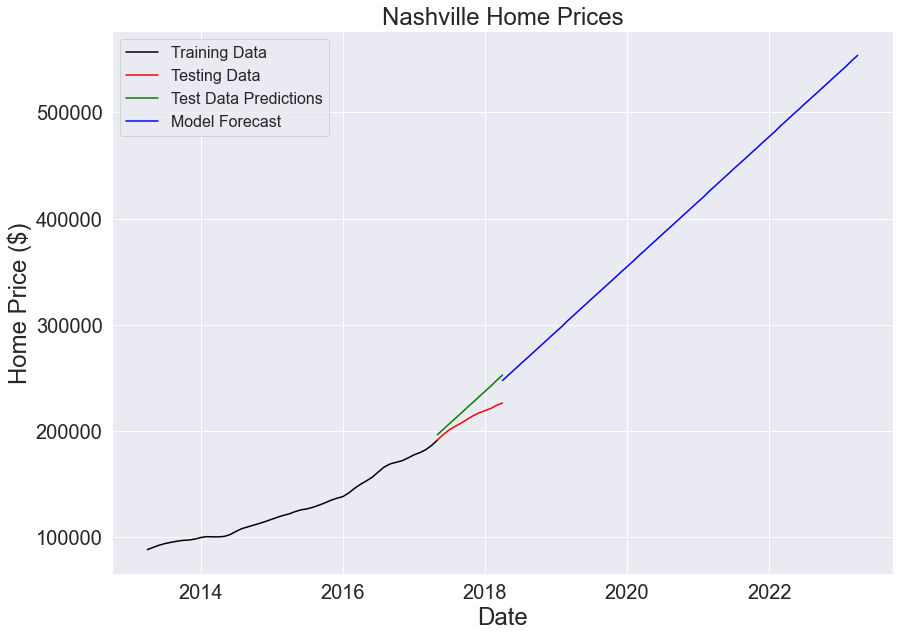

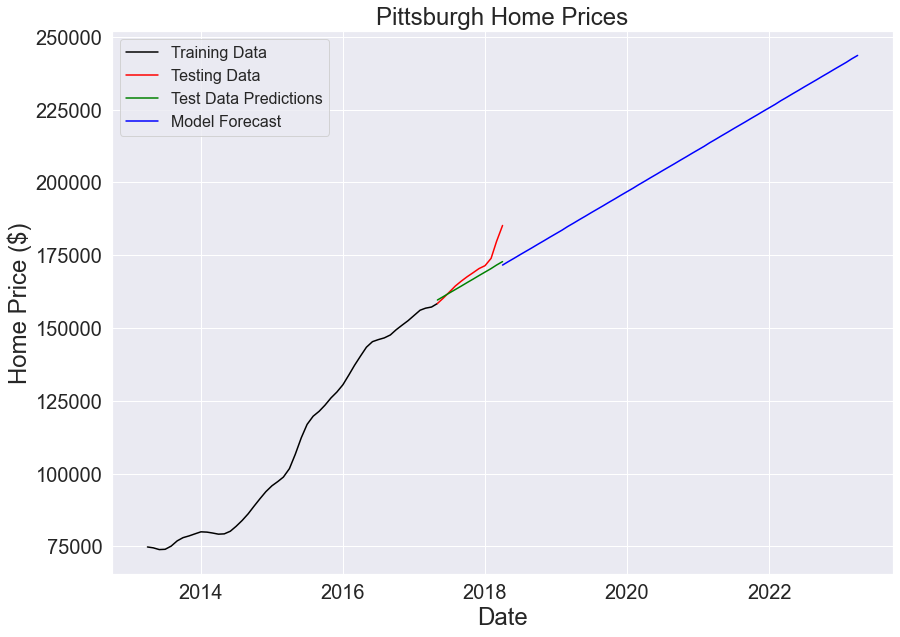

In [40]:
train_errors = []
test_errors = []
one_year = []
three_year = []
five_year = []
for i in range(0,5):
    city = df.loc[df['zipcode'] == top_5_zipcodes[i]]
    city = city.iloc[:,7:-1]
    city = city.T
    city = city.rename(columns={top_5_indexes[i]:'home price'})
    city.index = city.index.astype('datetime64[ns]')
    city = city['2013-04':]
    
    cutoff = '2017-05'
    train = city[:cutoff]
    test = city[cutoff:]
    
    ar_1 = ARIMA(train, order=(0, 2, 0)).fit()
    
    train_pred = ar_1.predict()
    train_error = np.sqrt(mean_squared_error(train, train_pred))
    train_errors.append(train_error)
    
    y_pred = ar_1.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.05) 
    y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"]
    test_error = np.sqrt(mean_squared_error(test, y_pred_out))
    test_errors.append(test_error)
    
    output = ar_1.predict(start='2018-04-01',end='2023-04-01')
    
    sns.set(font_scale = 1)

    plt.figure(figsize=(14,10))
    plt.plot(train, color = "black",label='Training Data')
    plt.plot(test, color = "red",label='Testing Data')
    plt.ylabel('Home Price ($)', fontsize=24)
    plt.xlabel('Date', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(f"{top_5_cities[i]} Home Prices", fontsize=24)
    plt.plot(y_pred_out, color='green', label = 'Test Data Predictions')
    plt.plot(output, color='blue', label = 'Model Forecast')
    plt.legend(fontsize=16);

    pred1 = output[12]
    pred3 = output[36]
    pred5 = output[-1]
    actual = test['home price'][-1]
    change1 = ((pred1-actual)/actual) * 100
    change3 = ((pred3-actual)/actual) * 100
    change5 = ((pred5-actual)/actual) * 100
    one_year.append(change1)
    three_year.append(change3)
    five_year.append(change5)

In [38]:
top_5_cities_sorted = ['Nashville','St. Petersburg','Oakland','Denver','Pittsburgh']

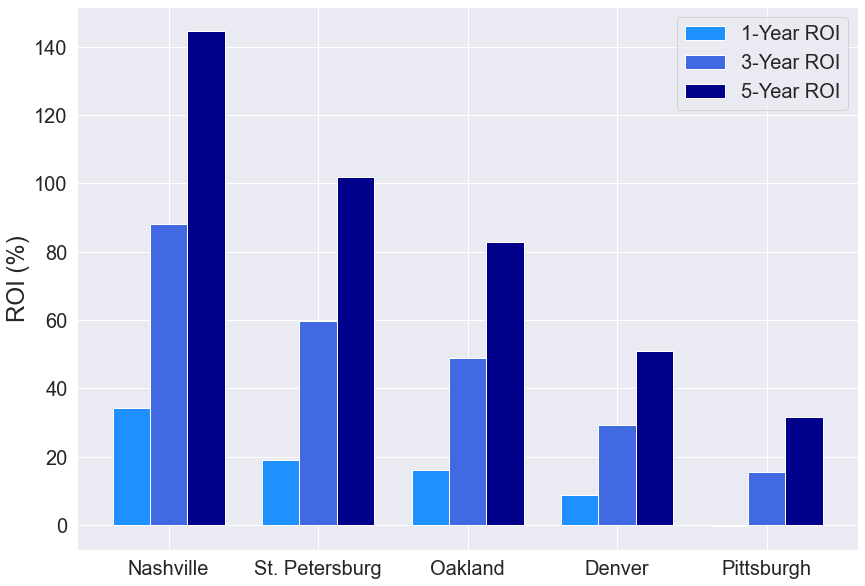

In [39]:
plt.figure(figsize=(14,10))

# set width of bars
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(one_year))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, sorted(one_year,reverse=True), color='dodgerblue', width=barWidth, edgecolor='white', label='1-Year ROI')
plt.bar(r2, sorted(three_year,reverse=True), color='royalblue', width=barWidth, edgecolor='white', label='3-Year ROI')
plt.bar(r3, sorted(five_year,reverse=True), color='darkblue', width=barWidth, edgecolor='white', label='5-Year ROI')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(one_year))], top_5_cities_sorted)

plt.ylabel('ROI (%)', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16);
 
# Create legend & Show graphic
plt.legend(fontsize=20)
plt.show()

# Evaluation

In [41]:
train_errors

[15908.69643858733,
 37525.90706870076,
 11340.157390819606,
 14539.733453562305,
 12400.606807693952]

In [46]:
from statistics import mean
mean(train_errors)

18343.02023187279

In [47]:
test_errors

[4469.712891599787,
 12067.760079374024,
 2748.4844308576075,
 15164.157301566964,
 4629.344806053372]

In [48]:
mean(test_errors)

7815.891901890351

# Recommendations